1. Dataset Selection and Initial Analysis:

Step 1: Choose two datasets from the list provided (Iris, Mall Customers, Wholesale Customers).

Step 2: Conduct an initial exploratory data analysis (EDA) for each dataset to understand its characteristics, including data distribution, feature correlations, and potential outliers.


In [262]:
import pandas as pd
df1=pd.read_csv('Mall_Customers.csv')
df1


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [263]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df1['Genre']= encoder.fit_transform(df1['Genre'])

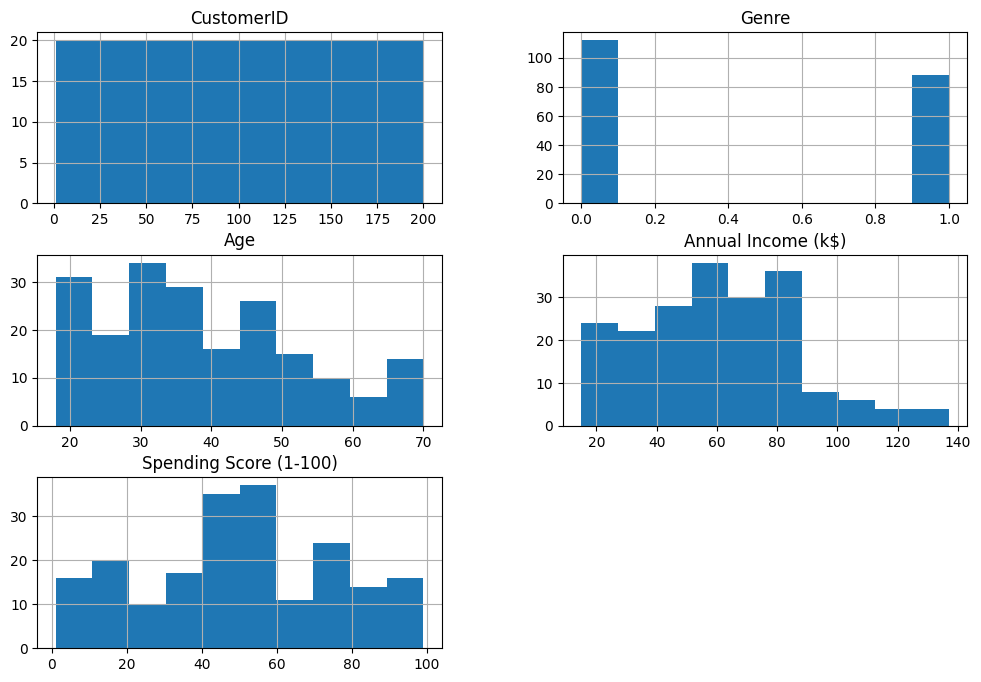

In [264]:
# Data Distribution
import matplotlib.pyplot as plt
df1.hist(figsize=(12, 8))
plt.show()


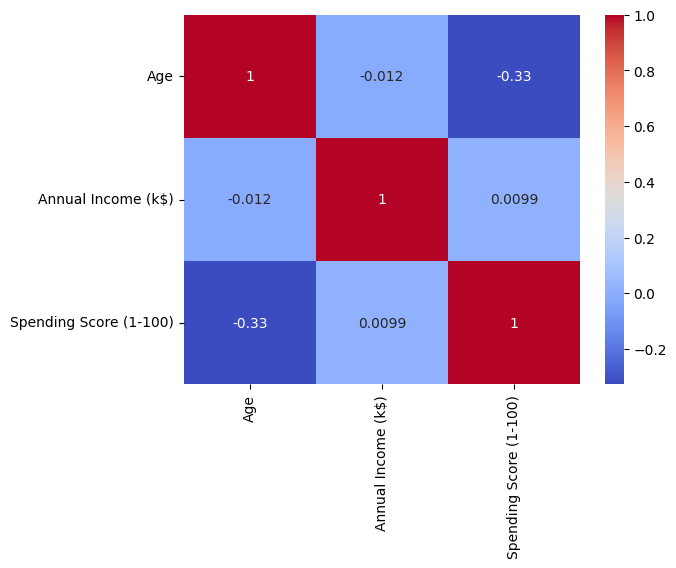

In [265]:
# Feature Correlations
import seaborn as sns
correlation_matrix = df1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


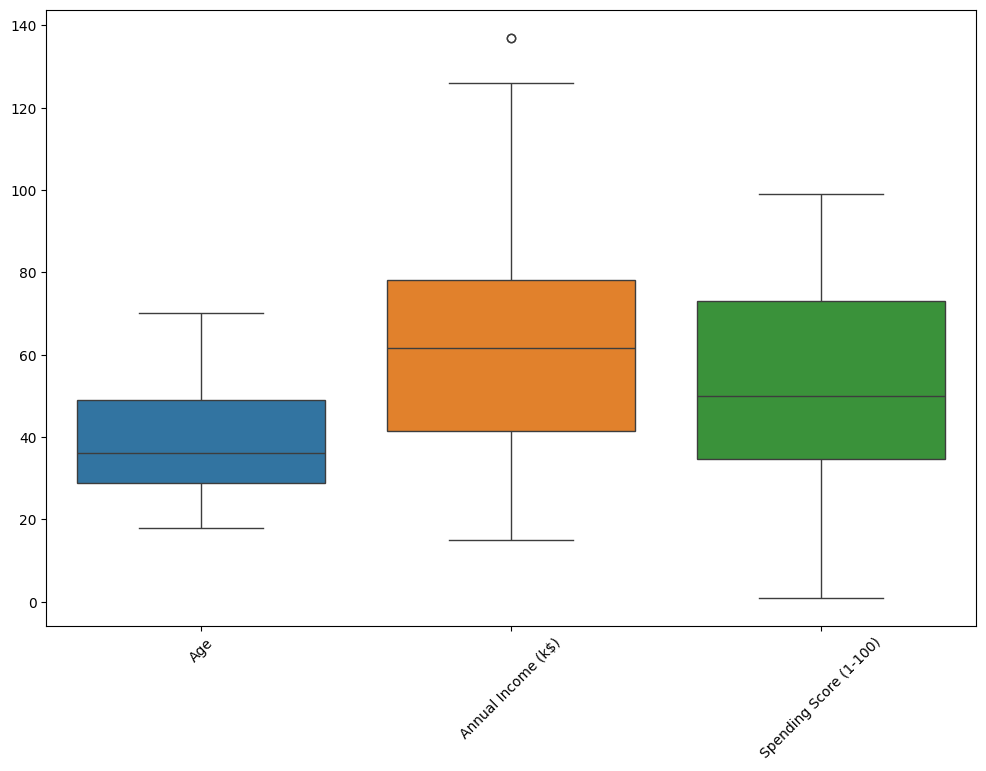

In [266]:
# identifying potential outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.xticks(rotation=45)
plt.show()
# df1['Annual Income (k$)'].min()

In [267]:
df1.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [268]:
df2=pd.read_csv("Wholesale customers data.csv")
df2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [269]:
df2=df2.drop(columns='Channel')


In [270]:
df2=df2.drop(columns='Region')

In [271]:
X = df2[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]


In [272]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
normalized= scaler.fit_transform(X)

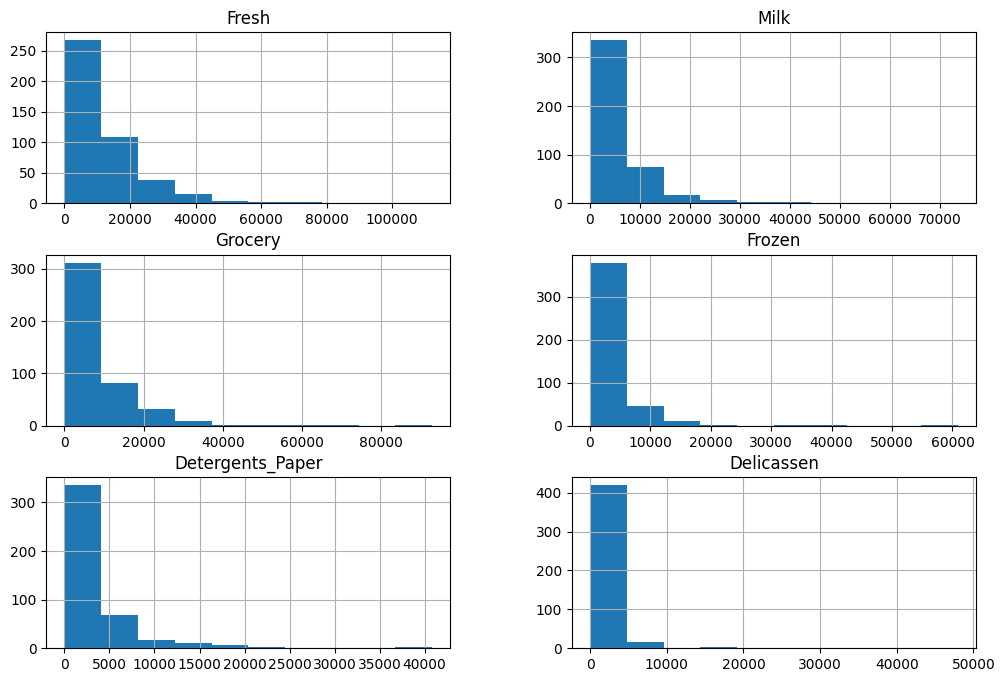

In [273]:
# Data Distribution
import matplotlib.pyplot as plt
df2.hist(figsize=(12, 8))
plt.show()

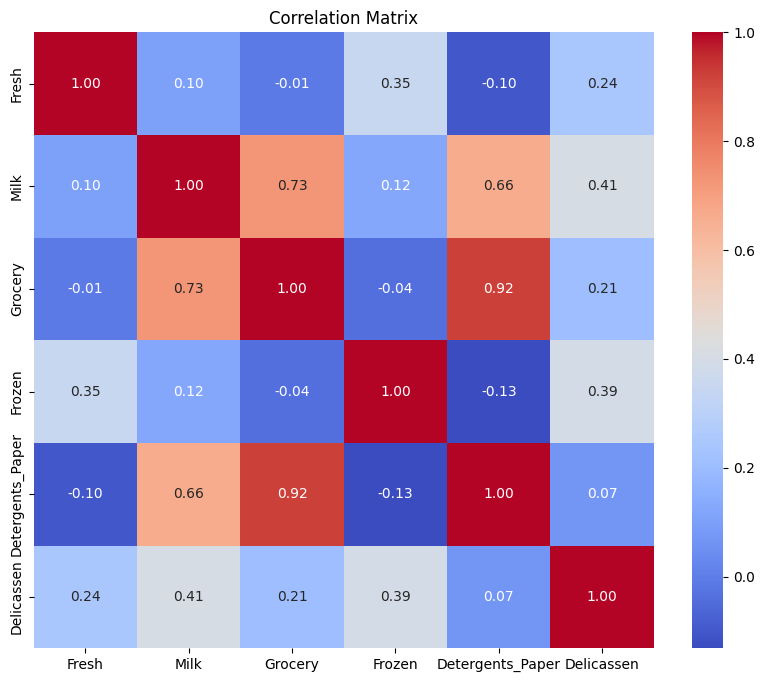

In [274]:
# Feature Correlations
correlation_matrix = df2[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


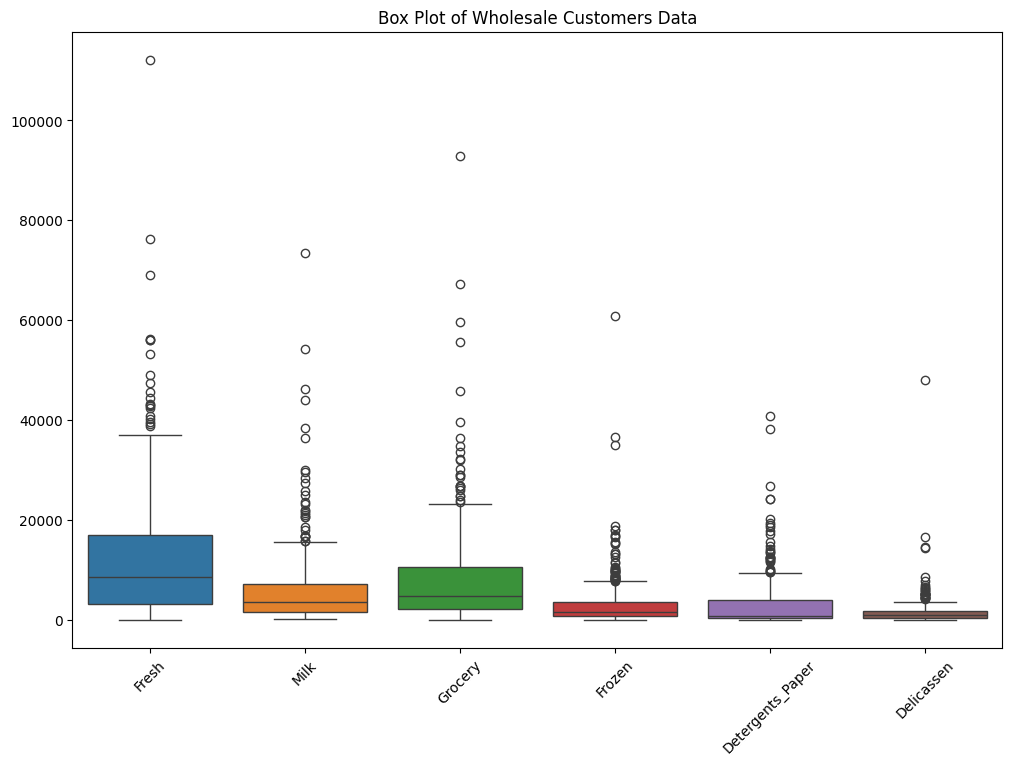

In [275]:
# identifying potential outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df2[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])
plt.xticks(rotation=45)
plt.title('Box Plot of Wholesale Customers Data')
plt.show()


2. Implementing Clustering Algorithms:

Step 3: Apply K-Means clustering to both datasets. Determine the optimal number of clusters using methods such as the Elbow Method and Silhouette Score.

Step 4: Apply Hierarchical Clustering to both datasets, choosing an appropriate linkage criterion (e.g., single, complete, average) and visualizing the dendrogram to determine the number of clusters.


<function matplotlib.pyplot.show(close=None, block=None)>

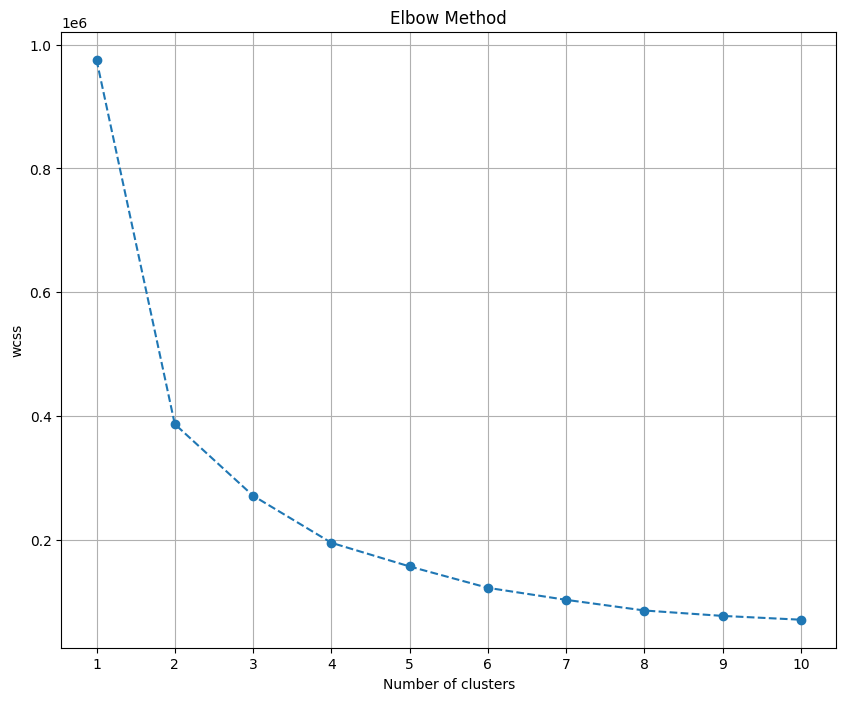

In [276]:
wcss=[]
for i in range(1,11):
    km= KMeans(n_clusters=i, n_init=10, random_state=42)
    km.fit(df1)
    wcss.append(km.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.title("Elbow Method")
plt.xticks(range(1,11))
plt.grid(True)
plt.show

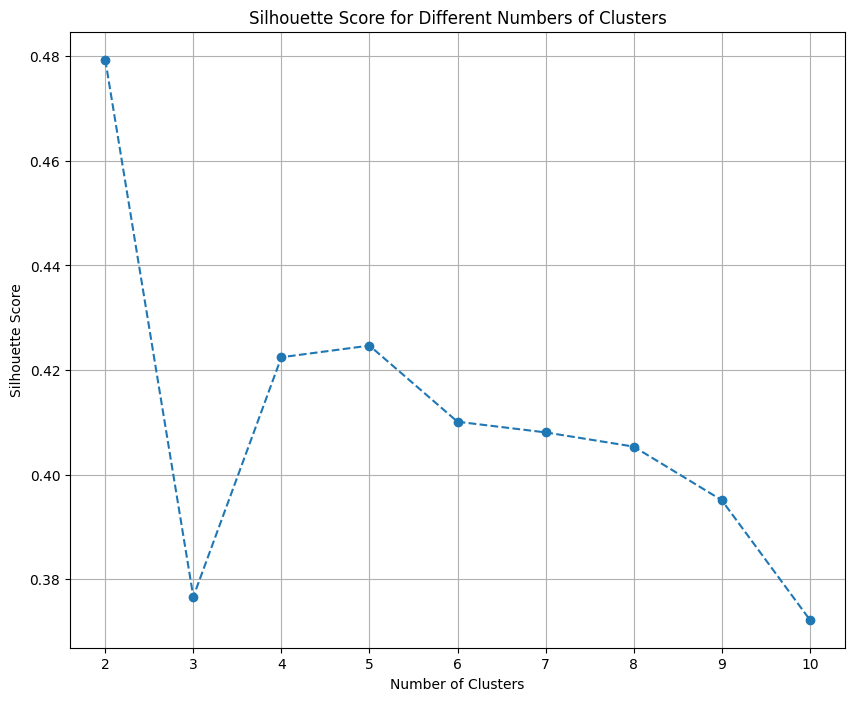

In [277]:
from sklearn.metrics import silhouette_score
silhouette_scores=[]
for i in range(2,11):
    km= KMeans(n_clusters=i, n_init=10, random_state=42)
    km.fit(df1)
    labels= km.labels_
    scores= silhouette_score(df1, labels)
    silhouette_scores.append(scores)

plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()    

In [278]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=2, n_init=10, max_iter=300, random_state=0)
kmean.fit(df1)
clusters1 = kmean.fit_predict(df1)



<function matplotlib.pyplot.show(close=None, block=None)>

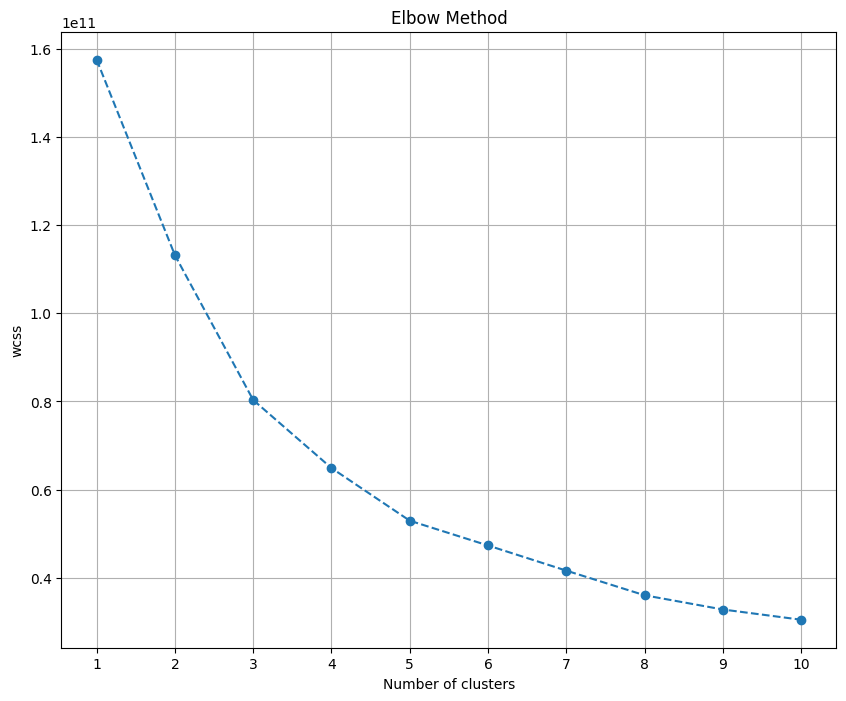

In [279]:
wcss=[]
for i in range(1,11):
    km= KMeans(n_clusters=i, n_init=10, random_state=42)
    km.fit(df2)
    wcss.append(km.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.title("Elbow Method")
plt.xticks(range(1,11))
plt.grid(True)
plt.show

In [280]:
df2.dtypes

Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

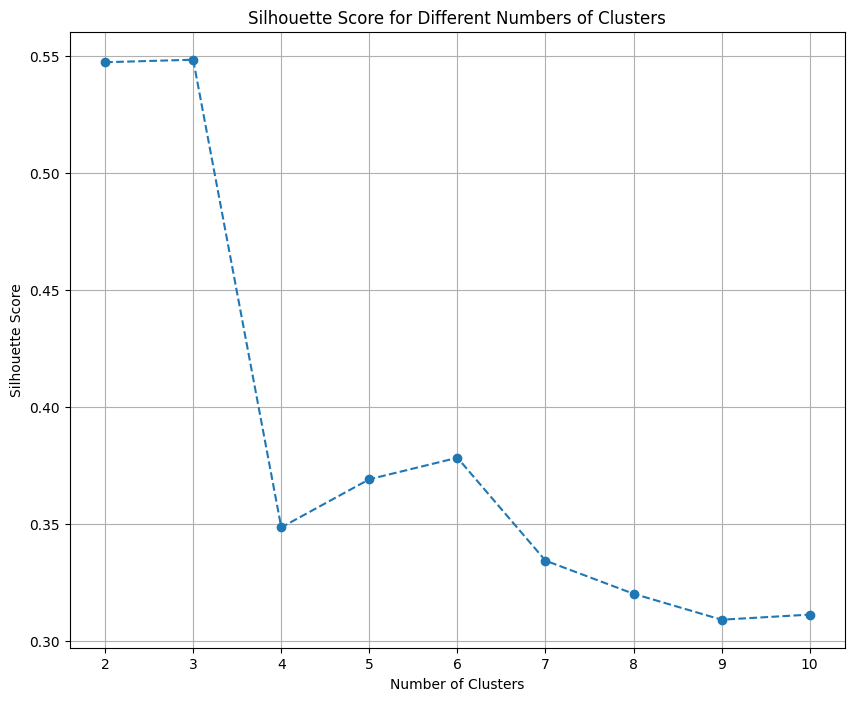

In [281]:
from sklearn.metrics import silhouette_score
silhouette_scores=[]
for i in range(2,11):
    km= KMeans(n_clusters=i, n_init=10, random_state=42)
    km.fit(normalized)
    labels= km.labels_
    scores= silhouette_score(normalized, labels)
    silhouette_scores.append(scores)

plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()    

In [282]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=2, n_init=10, max_iter=300, random_state=0)
kmean.fit(normalized)
clusters2 = kmean.fit_predict(normalized)



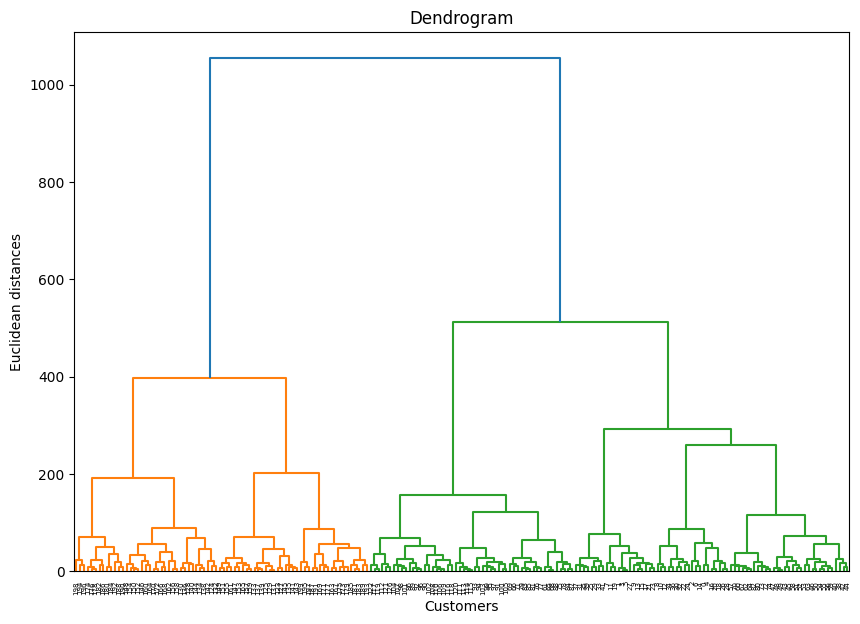

In [283]:
#  Hierarchical Clustering on df1
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df1, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

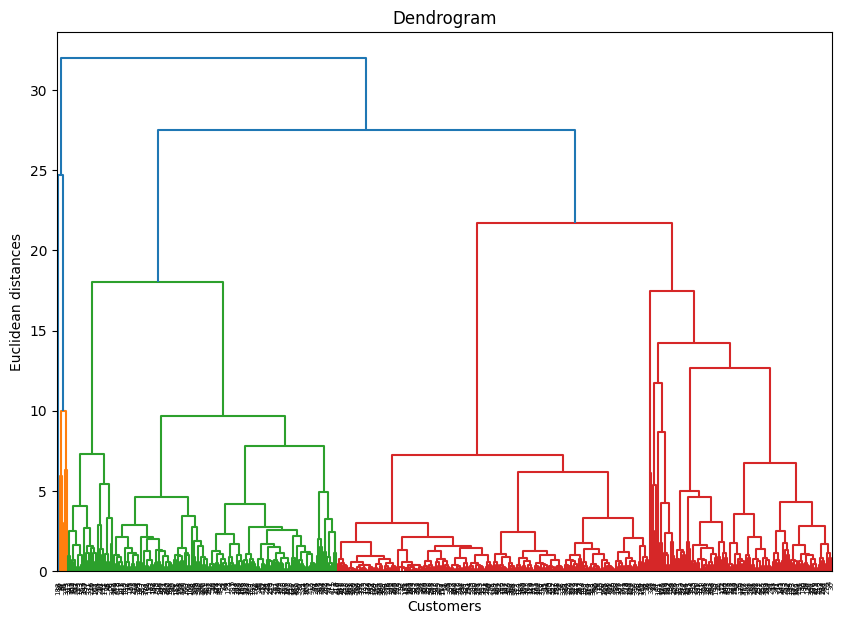

In [284]:
#  Hierarchical Clustering on df2
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(normalized, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

3. Cluster Visualization and Interpretation:

Step 5: Visualize the clusters obtained from both K-Means and Hierarchical Clustering. Use dimensionality reduction techniques like PCA or t-SNE to help in visualizing the clusters, if necessary.

Step 6: Compare the clustering results qualitatively (e.g., cluster compactness, separation) and quantitatively (e.g., Silhouette Score, Davies-Bouldin Index).


Text(0.5, 1.0, 'K-Means Clustering on df1')

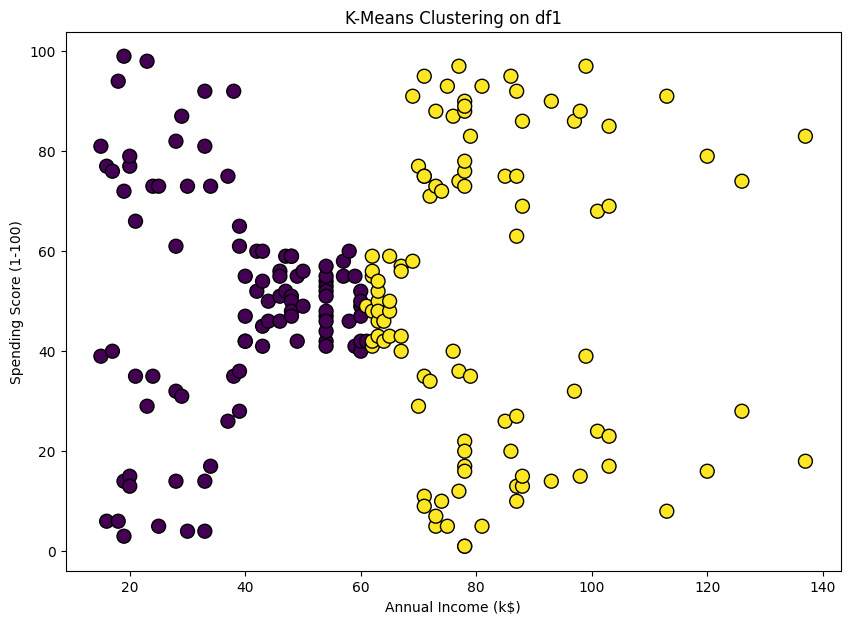

In [285]:
plt.figure(figsize=(10, 7))
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], c=clusters1, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering on df1')

In [286]:
# K-Means Clustering on df1
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
standardized_pca = pca.fit_transform(normalized)
pca_features = pca.fit_transform(normalized)

pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])


In [287]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3, random_state=10)
kmeans_labels = kmean.fit_predict(normalized)

pca_df['KMeans_Cluster'] = kmeans_labels

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'PCA Component 2')

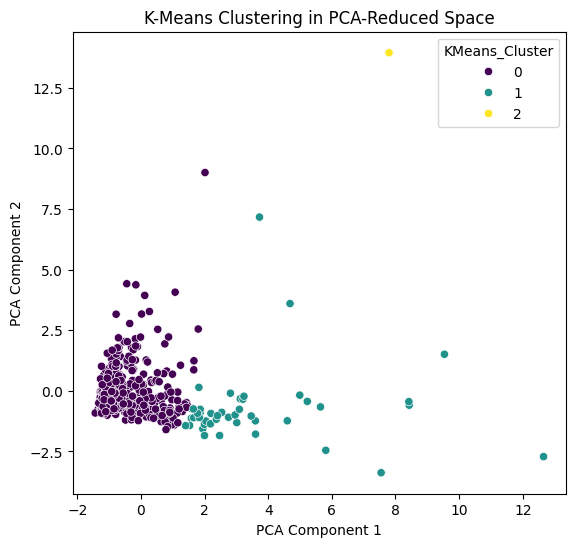

In [288]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='viridis', data=pca_df, legend='full')
plt.title('K-Means Clustering in PCA-Reduced Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')


4. Exploratory Analysis and Insights:

Step 7: Analyze the clusters in the context of the original features. For each dataset, interpret the clusters to identify any patterns or insights (e.g., customer segments, species differentiation).

Step 8: Explore the impact of different clustering parameters (e.g., number of clusters in K-Means, linkage criteria in Hierarchical Clustering) on the results.


5. Comparison and Reporting:

Step 9: Compare the effectiveness of K-Means and Hierarchical Clustering across the two datasets. 

Discuss which algorithm performed better for each dataset and why, considering factors such as data distribution and feature space.
